In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorama

In [88]:
pm = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment15/Code(0~720)/parameter_combinations.csv",header=0,index_col=[0])

In [89]:
print(colorama.Fore.GREEN+f"the shape of parameter combinations dataframe is {pm.shape}")
print(colorama.Fore.GREEN+f"there are {pm.shape[0]} parameter combinations in total")
print(colorama.Fore.GREEN+f"the parameters are as the following {pm.columns.tolist()}")

the shape of parameter combinations dataframe is (2880, 15)
there are 2880 parameter combinations in total
the parameters are as the following ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'fitness_function', 'algorithm']


In [90]:
# rewrite the code in this cell using a loop
one = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment15/Code(0~720)/solutions_dataframe.csv",header=0,index_col=0)
two = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment15/Code(720~1440)/solutions_dataframe.csv",header=0,index_col=0)
three = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment15/Code(1440~2160)/solutions_dataframe.csv",header=0,index_col=0)
four = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment15/Code(2160~2880)/solutions_dataframe.csv",header=0,index_col=0)
print(colorama.Fore.YELLOW+f"the shape of one is {one.shape}")
print(colorama.Fore.YELLOW+f"the shape of two is {two.shape}")
print(colorama.Fore.YELLOW+f"the shape of three is {three.shape}")
print(colorama.Fore.YELLOW+f"the shape of four is {four.shape}")

the shape of one is (720, 10)
the shape of two is (720, 10)
the shape of three is (720, 10)
the shape of four is (720, 10)


In [91]:
# reindex the index of two,three,four
# reindex two from 720, according to its shape, the begining is 720
two.index = [i for i in range(720,720+two.shape[0])]
# reindex three from 1440, according to its shape, the begining is 1440
three.index = [i for i in range(1440,1440+three.shape[0])]
# reindex four from 2160, according to its shape, the begining is 2160
four.index = [i for i in range(2160,2160+four.shape[0])]
# print their index
print(colorama.Fore.YELLOW+f"the index of one is {one.index.tolist()}\n")
print(colorama.Fore.YELLOW+f"the index of two is {two.index.tolist()}\n")
print(colorama.Fore.YELLOW+f"the index of three is {three.index.tolist()}\n")
print(colorama.Fore.YELLOW+f"the index of four is {four.index.tolist()}\n")

the index of one is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

In [92]:
solution = pd.concat([one,two,three,four],axis=0)
# print the shape of solution
print(colorama.Fore.YELLOW+f"the shape of solution is {solution.shape}")
# print the index of solution
print(colorama.Fore.YELLOW+f"the index of solution is {solution.index.tolist()}")

the shape of solution is (2880, 10)
the index of solution is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209

In [93]:
# according to the index of solution dataframe, choose the corresponding row in pm dataframe
pm = pm.loc[solution.index.tolist()]
# print the shape of pm
print(colorama.Fore.YELLOW+f"the shape of pm is {pm.shape}")
# print the index of pm
print(colorama.Fore.YELLOW+f"the index of pm is {pm.index.tolist()}")

the shape of pm is (2880, 15)
the index of pm is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

In [94]:
solution.columns = ["Run"+str(i) for i in range(1,11,1)]
solution["sum"] = solution.sum(axis=1)
solution["mean"] = solution.mean(axis=1)
solution["min"] = solution.min(axis=1)
solution["max"] = solution.max(axis=1)
print(colorama.Fore.CYAN+f"the shape of solution dataframe is {solution.shape}")
print(colorama.Fore.CYAN+f"the columns of solution dataframe is the runs {solution.columns.tolist()}")

the shape of solution dataframe is (2880, 14)
the columns of solution dataframe is the runs ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max']


In [95]:
# check the index of pm and the index of solution are the same
print(colorama.Fore.CYAN+f"the index of pm is {pm.index.tolist()}")
print(colorama.Fore.CYAN+f"the index of solution is {solution.index.tolist()}")
print(colorama.Fore.CYAN+f"the index of pm and solution are the same? {pm.index.tolist()==solution.index.tolist()}")

the index of pm is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

In [96]:
df = pd.concat([pm,solution],axis=1)

In [97]:
print(colorama.Fore.RED+f"the columns of df is what we will use for plots {df.columns.tolist()}")
print(colorama.Fore.RED+f"the rows are the data {df.shape[0]}")

the columns of df is what we will use for plots ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'fitness_function', 'algorithm', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max']
the rows are the data 2880


In [98]:
function_list = df["fitness_function"].unique().tolist()
dimensions_list = df["dimensions"].unique().tolist()
mutation_rate_list = df["mutation_rate"].unique().tolist()
cross_rate_list = df["crossover_rate"].unique().tolist()
mutation_type_list = df["mutation_type"].unique().tolist()
crossover_type_list = df["crossover_type"].unique().tolist()
local_search_rate_list = df["local_search_rate"].unique().tolist()
local_search_type_list = df["local_search_type"].unique().tolist()
search_radius_list = df["search_radius"].unique().tolist()
gg_list = df["gg"].unique().tolist()
selection_method_list = df["selection_method"].unique().tolist()
algorithm_list = df["algorithm"].unique().tolist()
# get all the unique values of these parameters
print(colorama.Fore.BLUE+f"the functions are {function_list}")
print(colorama.Fore.BLUE+f"the dimensions are {dimensions_list}")
print(colorama.Fore.BLUE+f"the mutation_rate are {mutation_rate_list}")
print(colorama.Fore.BLUE+f"the cross_rate are {cross_rate_list}")
print(colorama.Fore.BLUE+f"the mutation_type are {mutation_type_list}")
print(colorama.Fore.BLUE+f"the crossover_type are {crossover_type_list}")
print(colorama.Fore.BLUE+f"the local_search_rate are {local_search_rate_list}")
print(colorama.Fore.BLUE+f"the local_search_type are {local_search_type_list}")
print(colorama.Fore.BLUE+f"the search_radius are {search_radius_list}")
print(colorama.Fore.BLUE+f"the gg are {gg_list}")
print(colorama.Fore.BLUE+f"the selection_method are {selection_method_list}")
print(colorama.Fore.BLUE+f"the algorithm are {algorithm_list}")

the functions are [1, 5, 7, 8, 10, 13]
the dimensions are [100]
the mutation_rate are [0.04, 0.02, 0.01]
the cross_rate are [0.5, 0.6, 0.7]
the mutation_type are ['Normal']
the crossover_type are ['Probabilistic_crossover']
the local_search_rate are [0.5]
the local_search_type are ['Uniform']
the search_radius are [0.1]
the gg are [0.01, 0.2, 0.5, 0.8, 0.99]
the selection_method are ['SSGA', 'sorted_selection_part', 'sorted_selection_all', 'roulette_Wheel_Select']
the algorithm are ['Baseline', 'Lamarck', 'Baldwin']


In [99]:
print(colorama.Fore.GREEN+f"pm.head(10) is {pm.head(10)}")
print(colorama.Fore.GREEN+f"solution.head(10) is {solution.head(10)}")
print(colorama.Fore.GREEN+f"df.head(10) is {df.head(10)}")

pm.head(10) is    num_generations  mutation_rate  num_individuals  crossover_rate  \
0          1000000           0.04              100             0.5   
1          1000000           0.04              100             0.5   
2          1000000           0.04              100             0.5   
3          1000000           0.04              100             0.5   
4          1000000           0.04              100             0.5   
5          1000000           0.04              100             0.5   
6          1000000           0.04              100             0.5   
7          1000000           0.04              100             0.5   
8          1000000           0.04              100             0.5   
9          1000000           0.04              100             0.5   

  mutation_type           crossover_type  local_search_rate local_search_type  \
0        Normal  Probabilistic_crossover                0.5           Uniform   
1        Normal  Probabilistic_crossover            

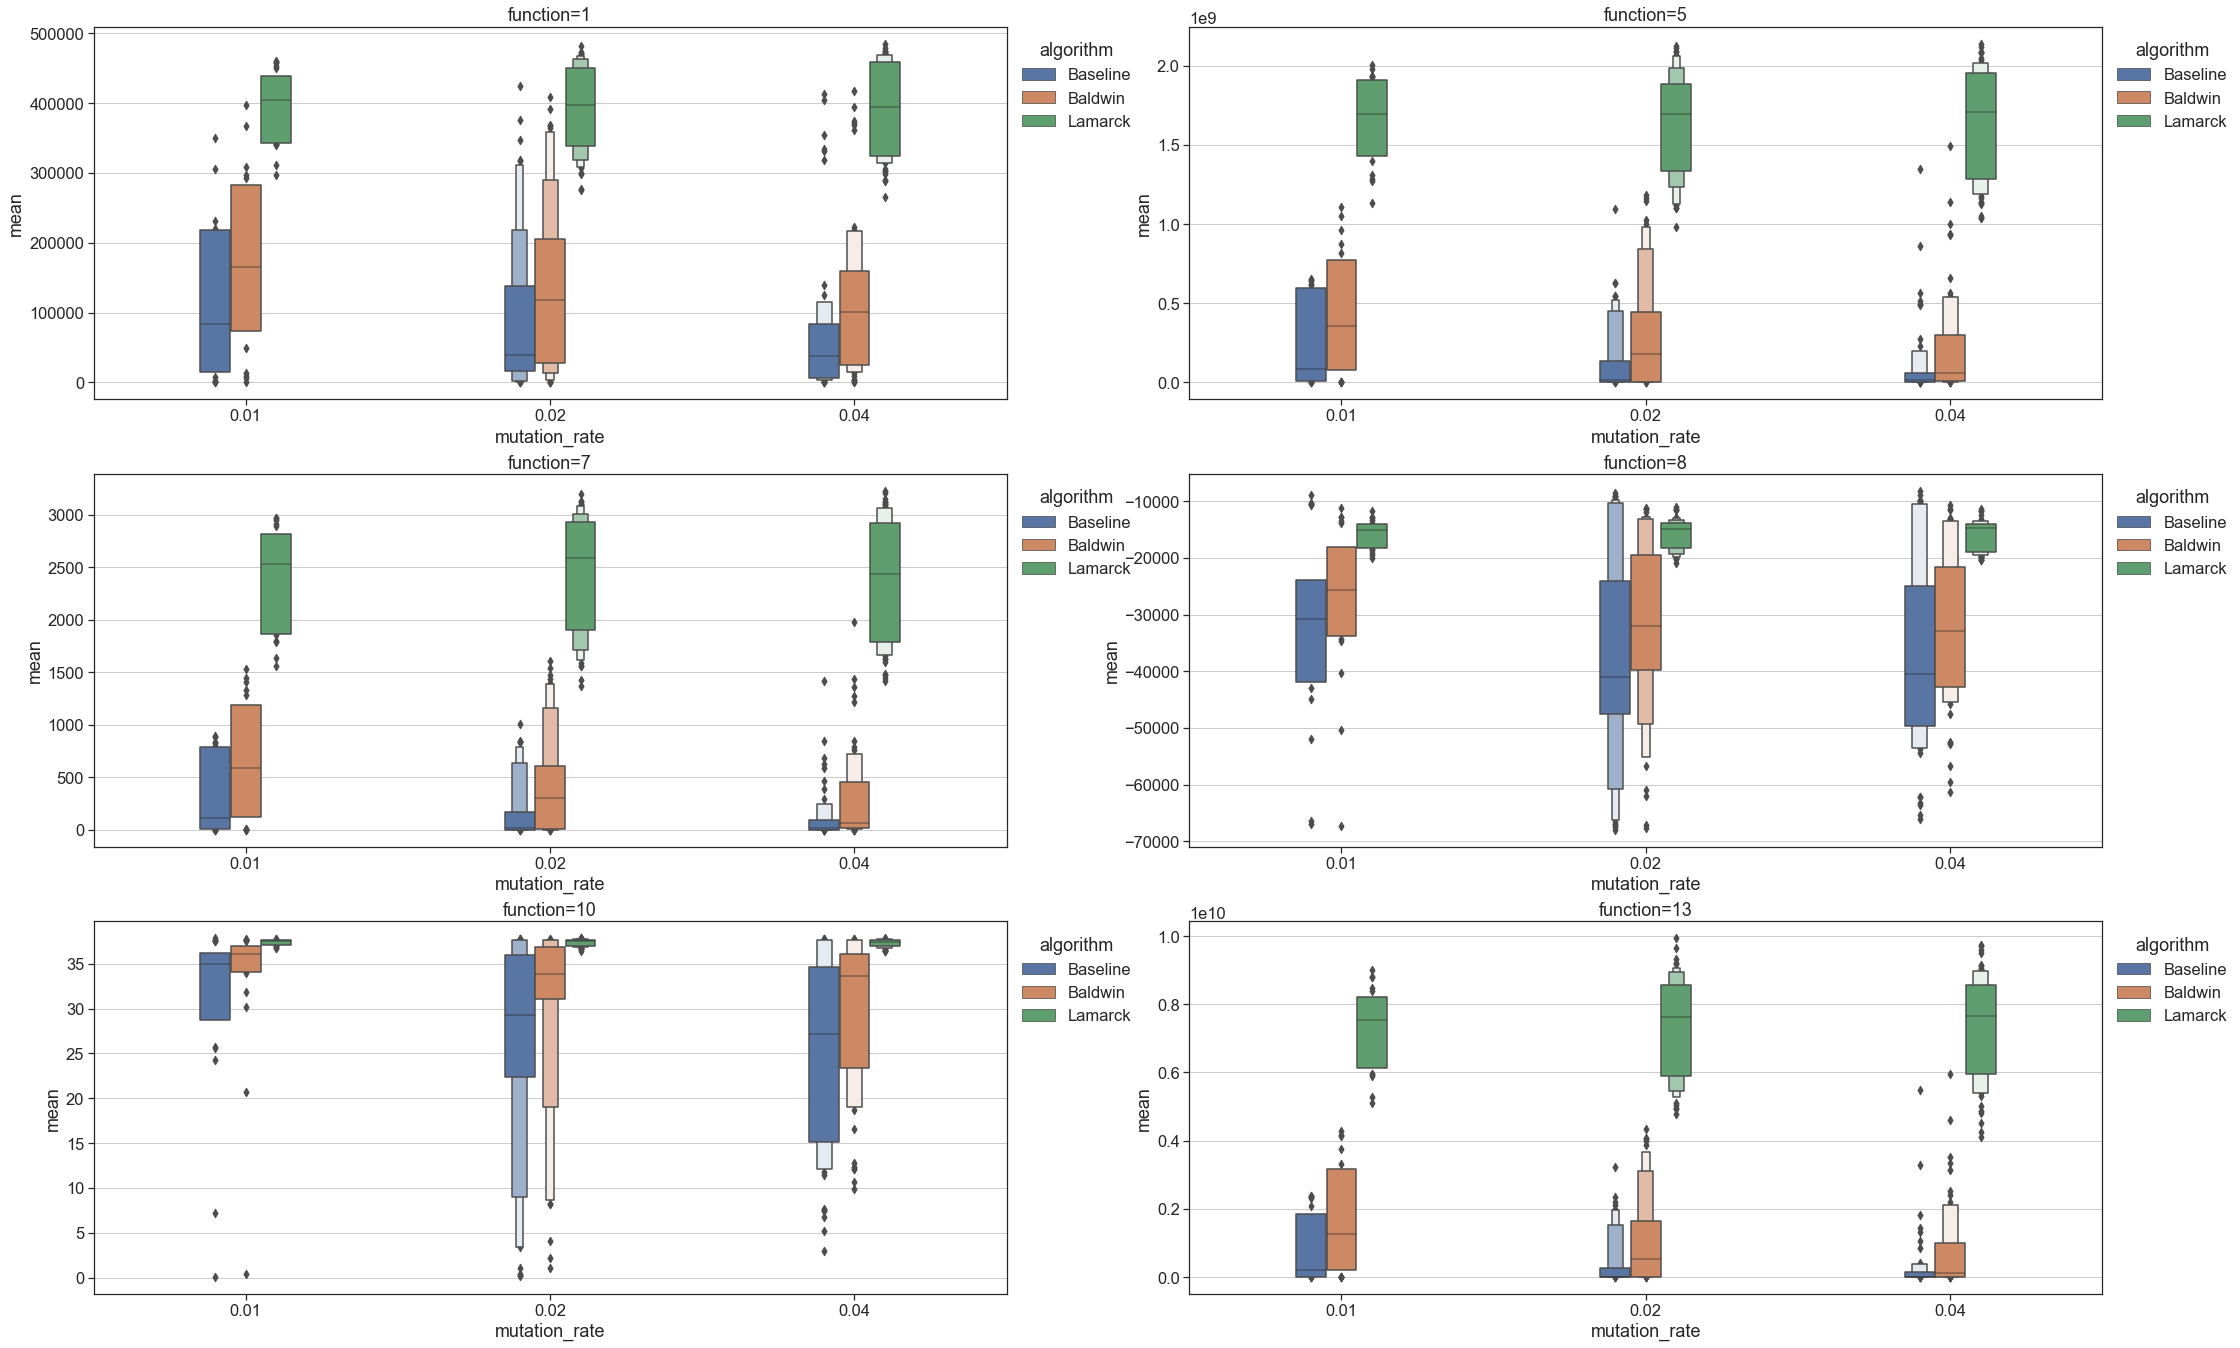

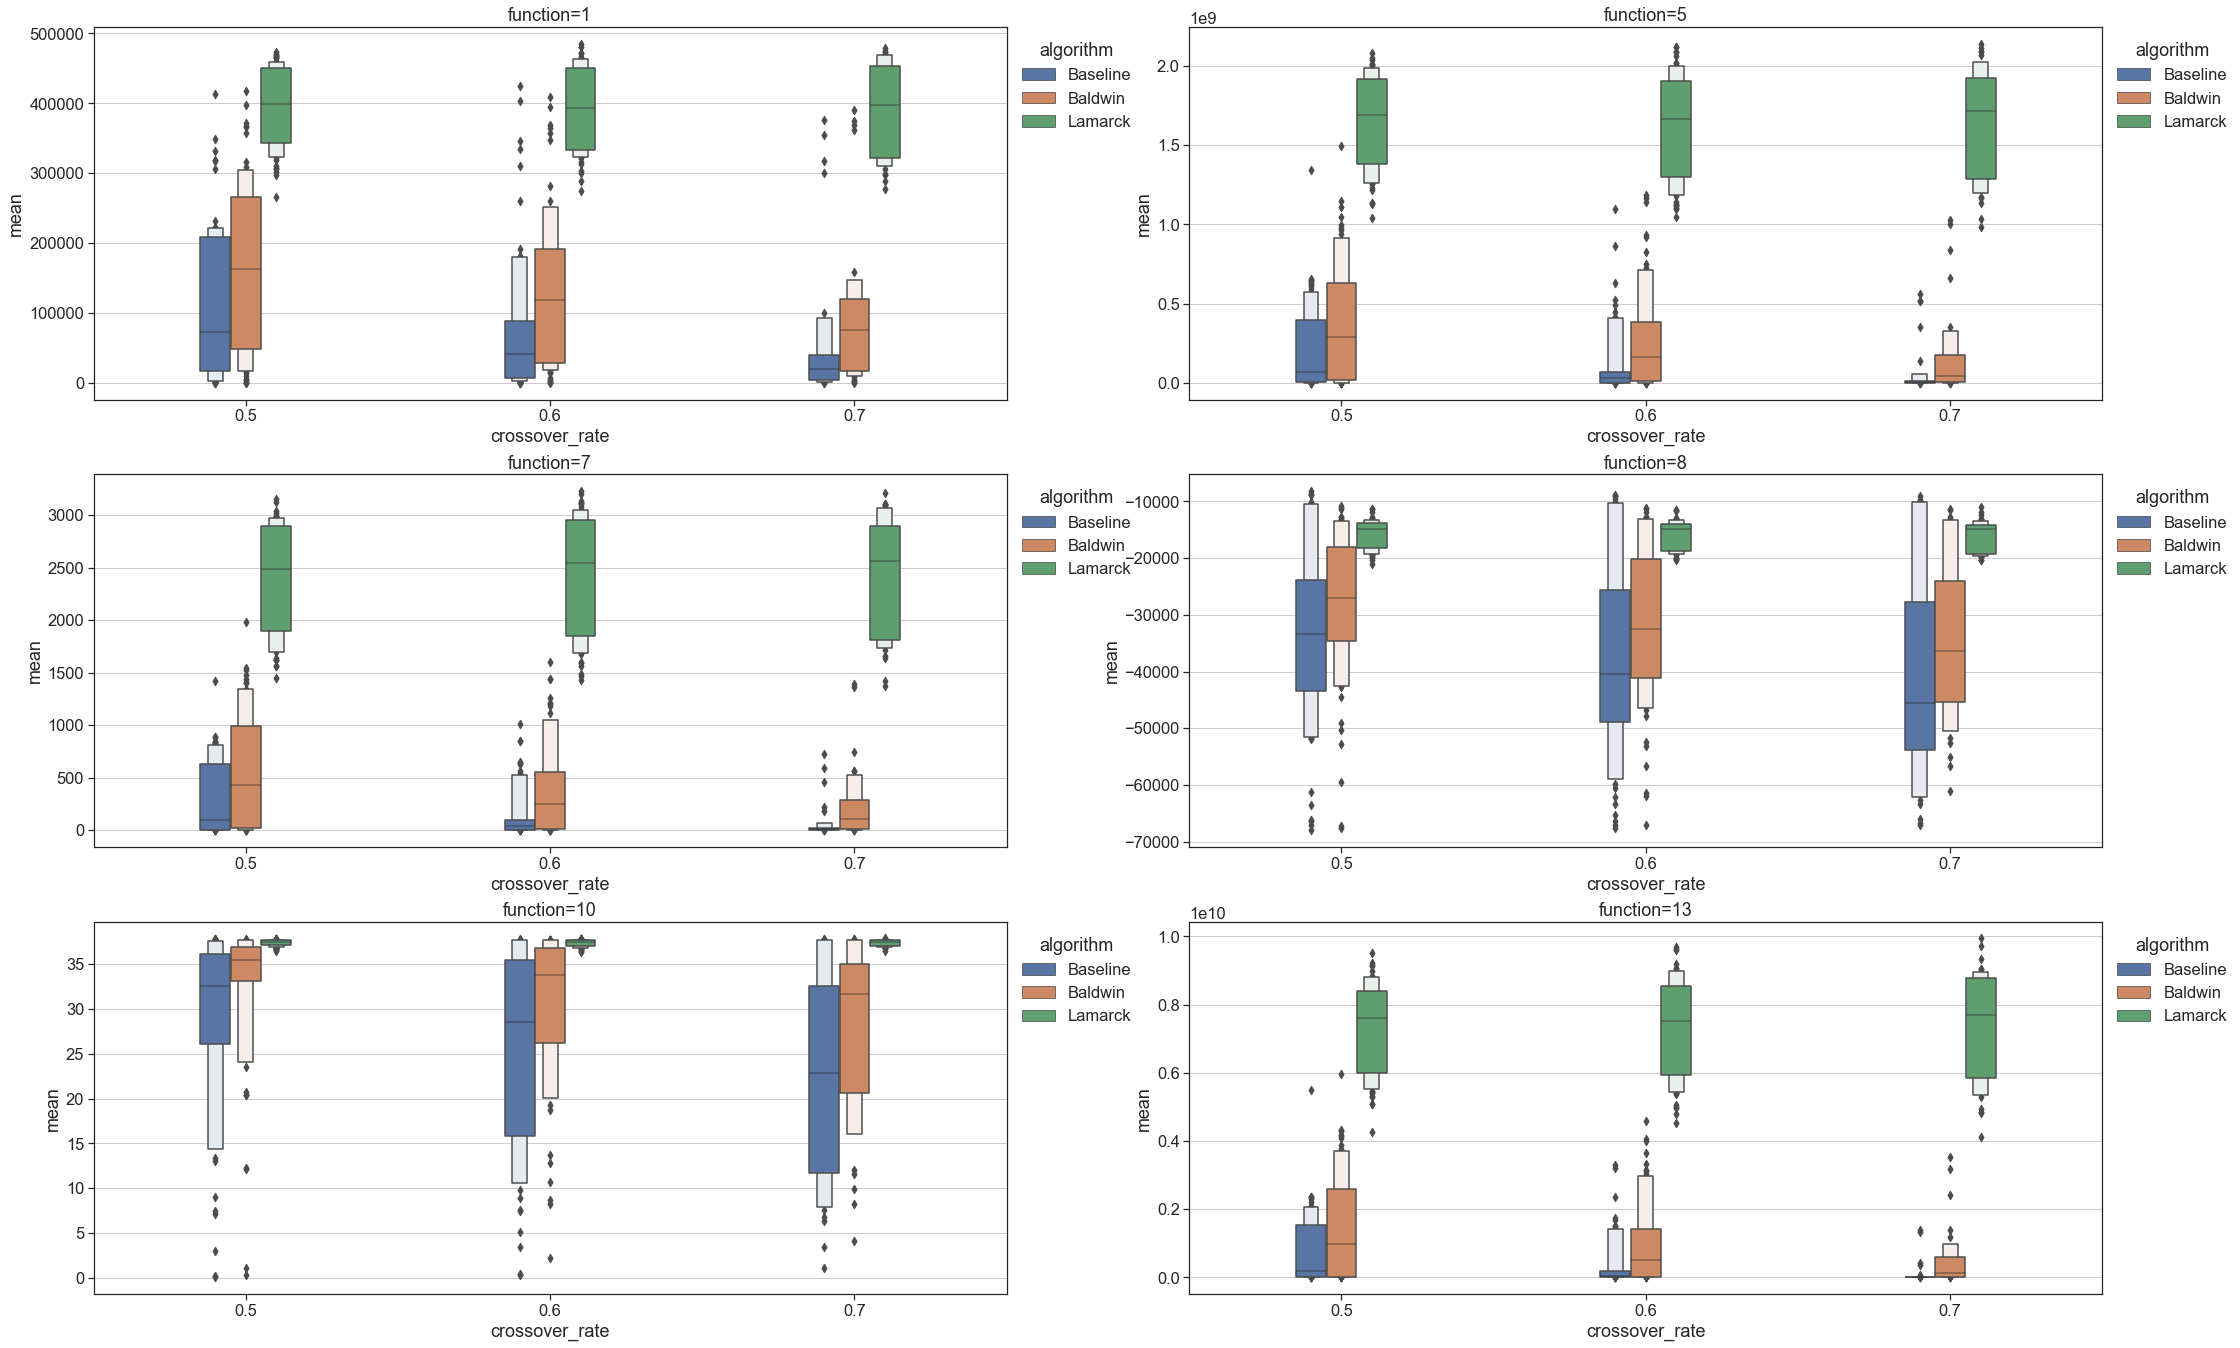

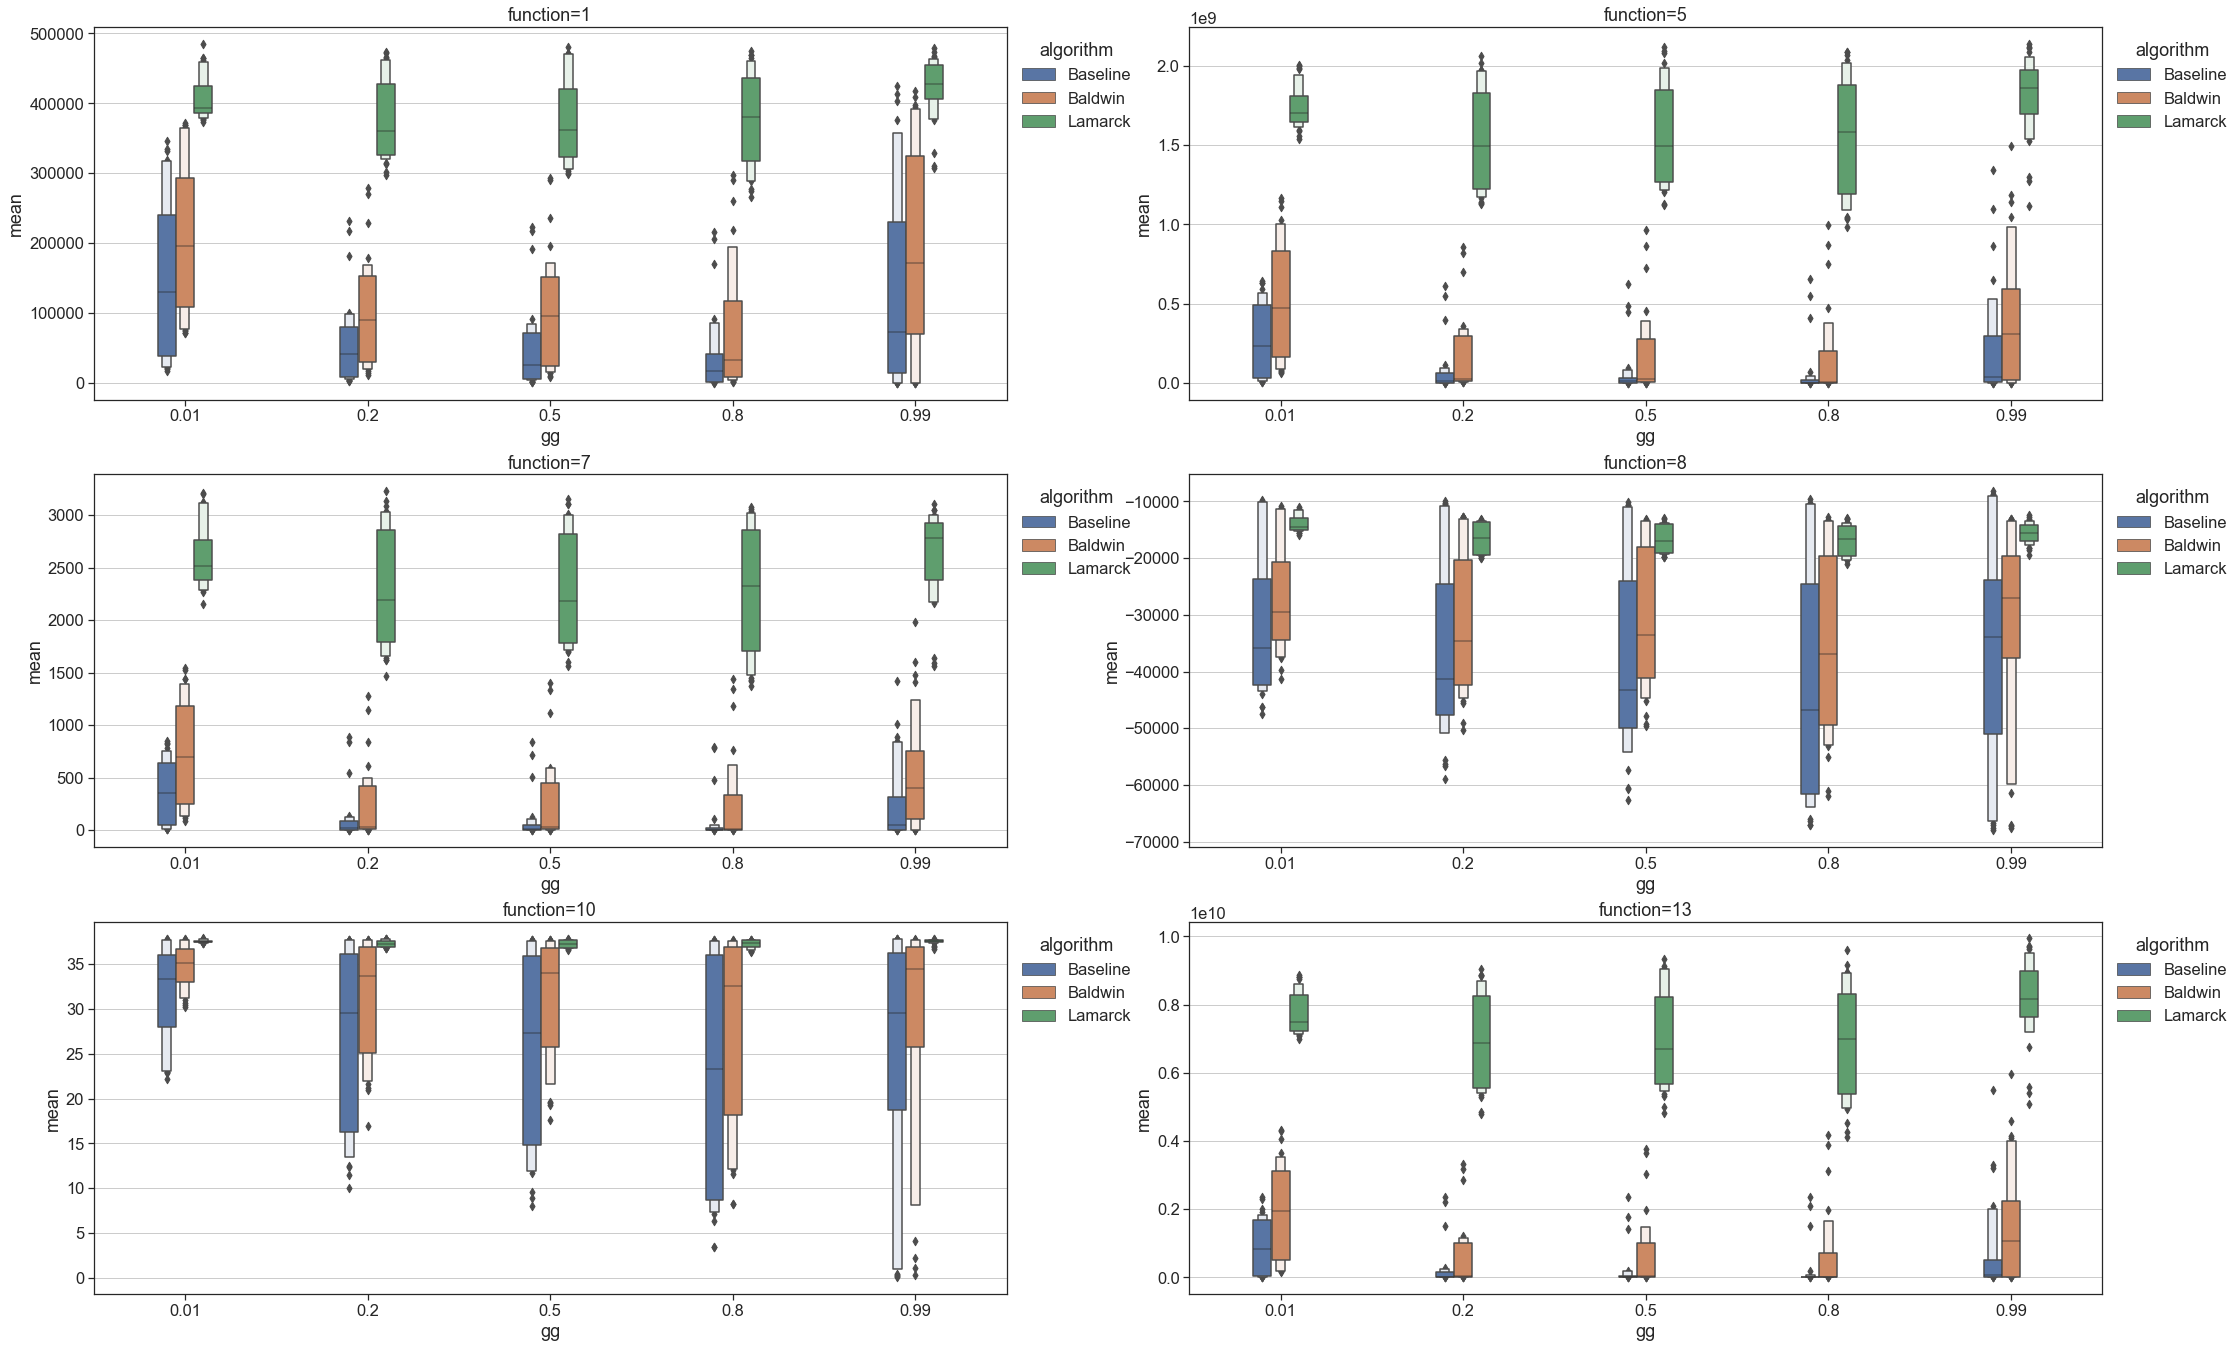

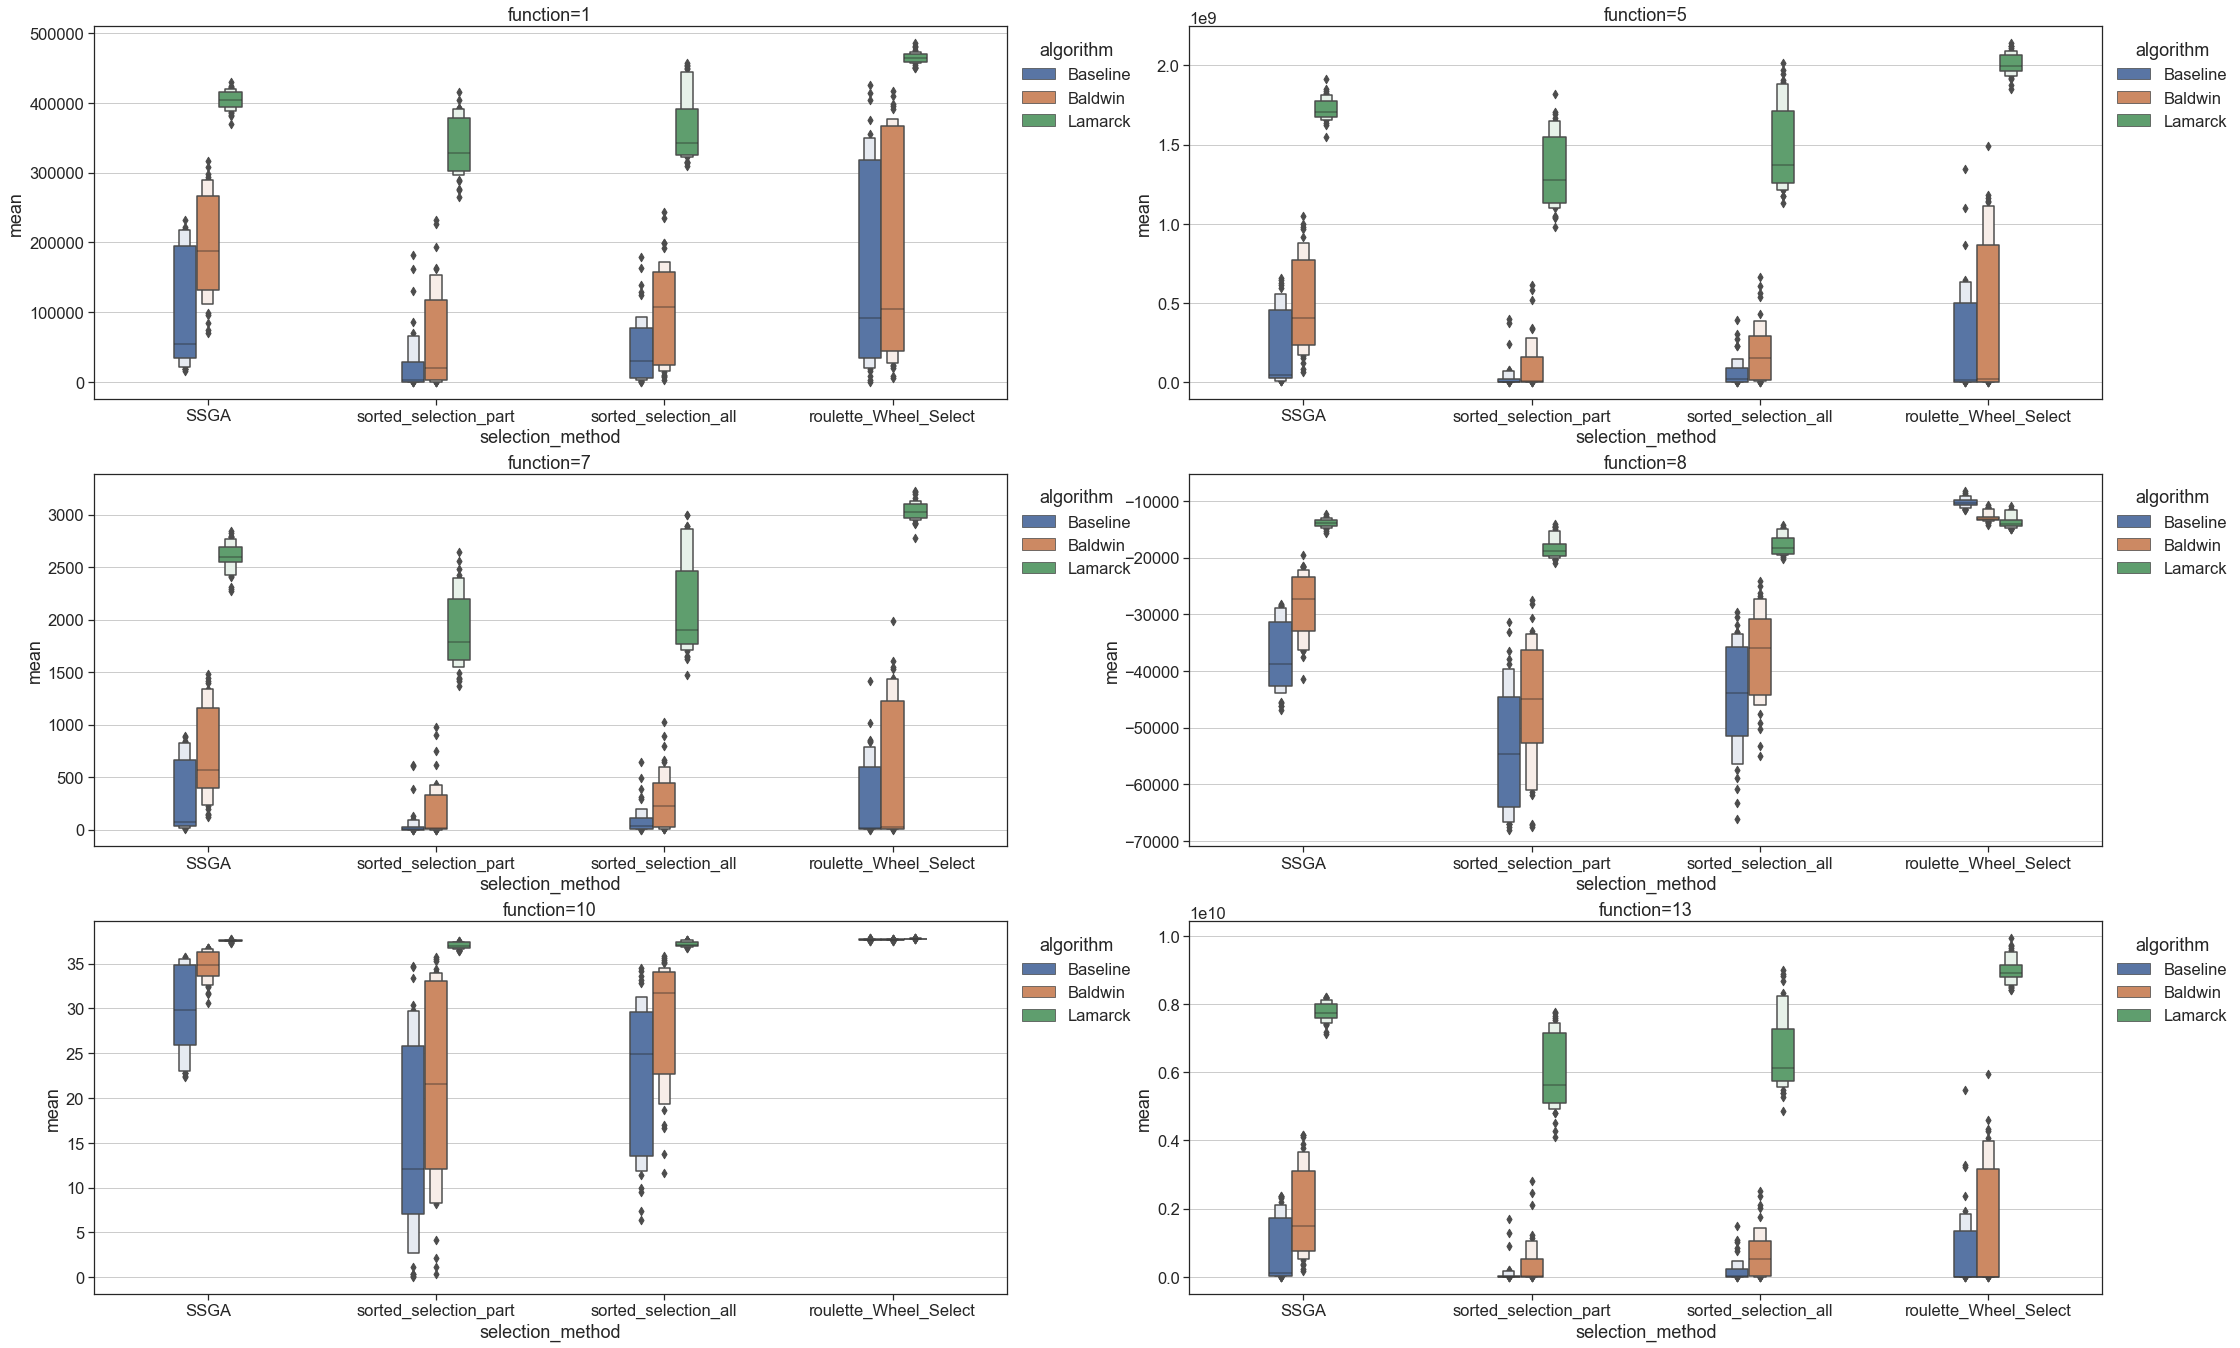

In [100]:
def show_graph(dataframe,xp):
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 6
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        data = dataframe[dataframe["fitness_function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.boxenplot(data=data, y="mean",x=xp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.3)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
        plt.title(f"function={func}")
        i = i + 1
    plt.savefig(f"{xp}.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=['mutation_rate','crossover_rate','gg', 'selection_method']
for i in xp_list:
    show_graph(dataframe=df,xp=i)

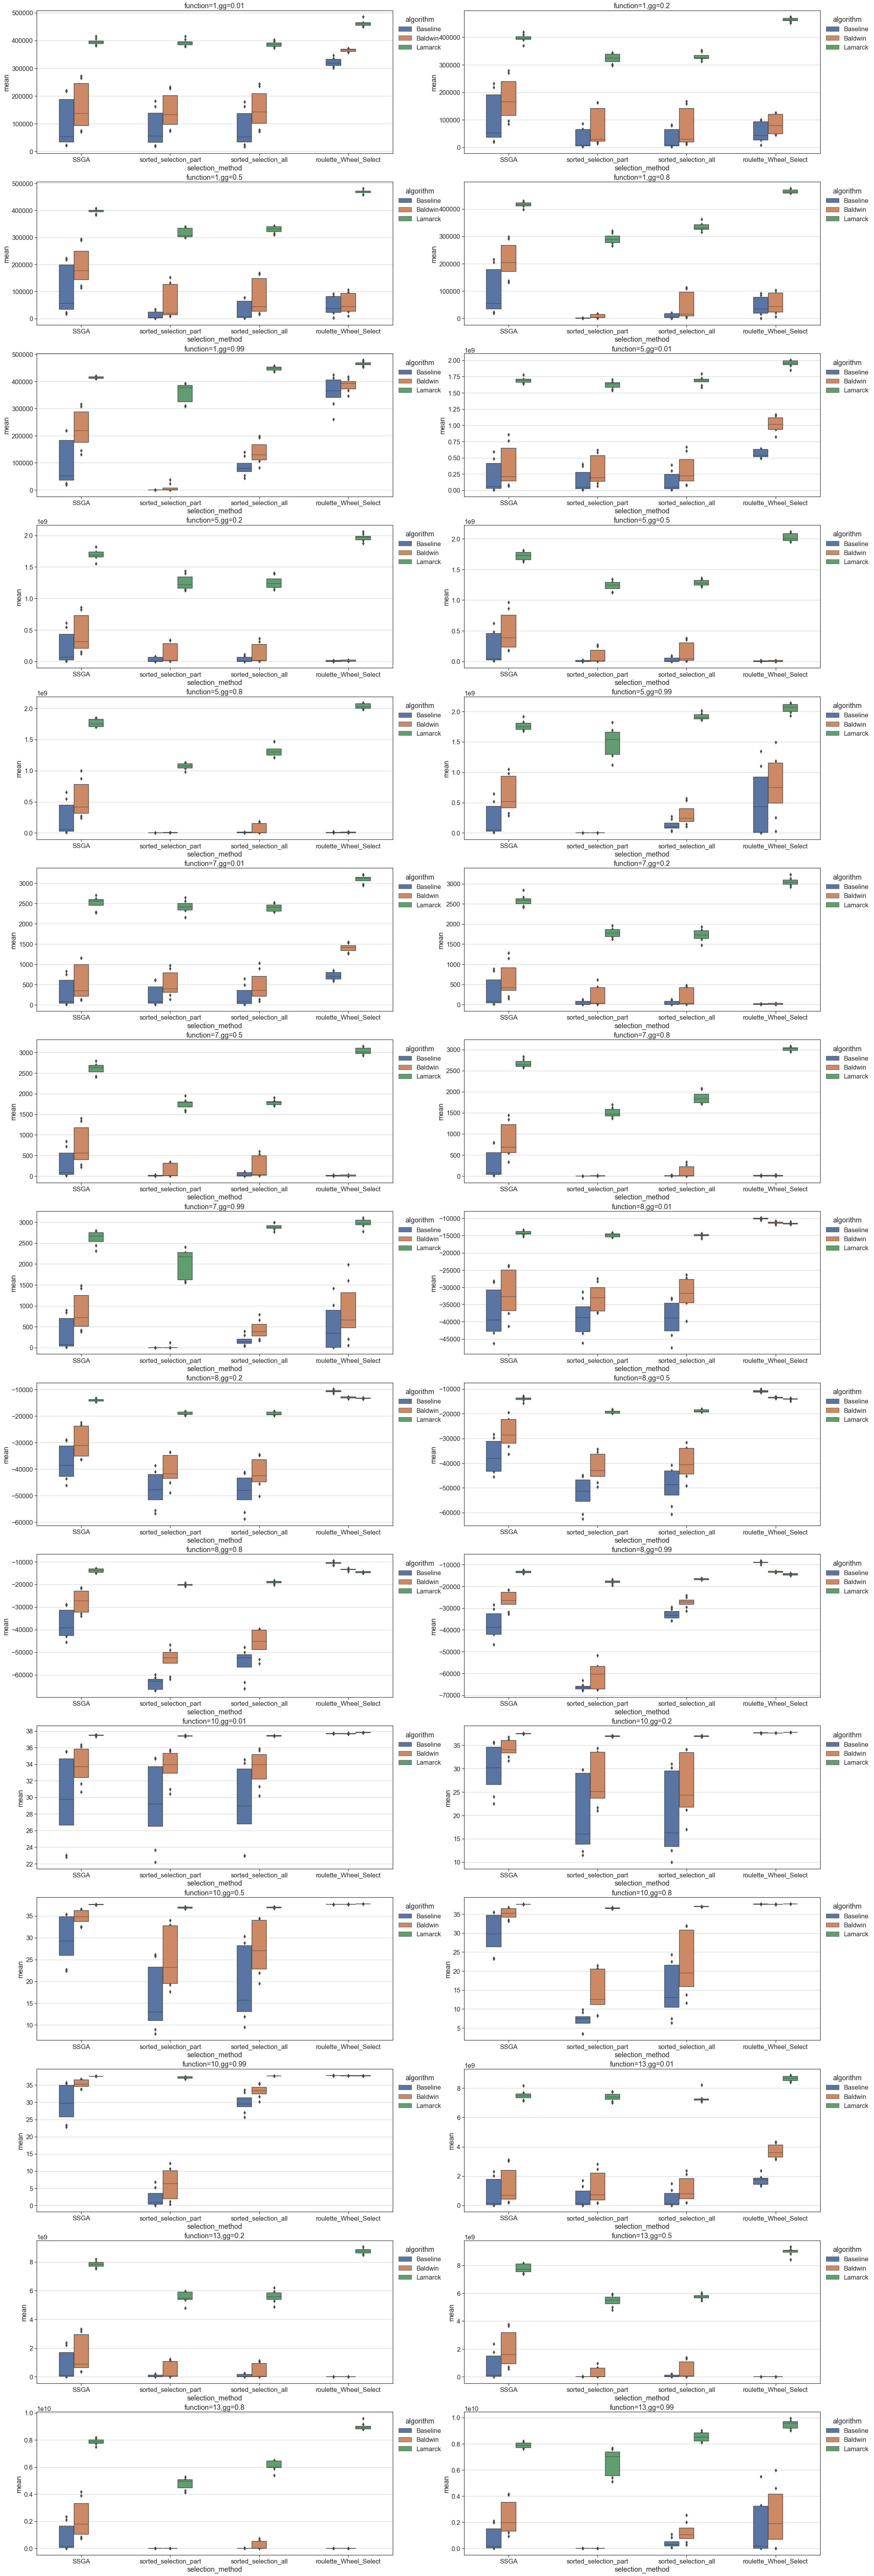

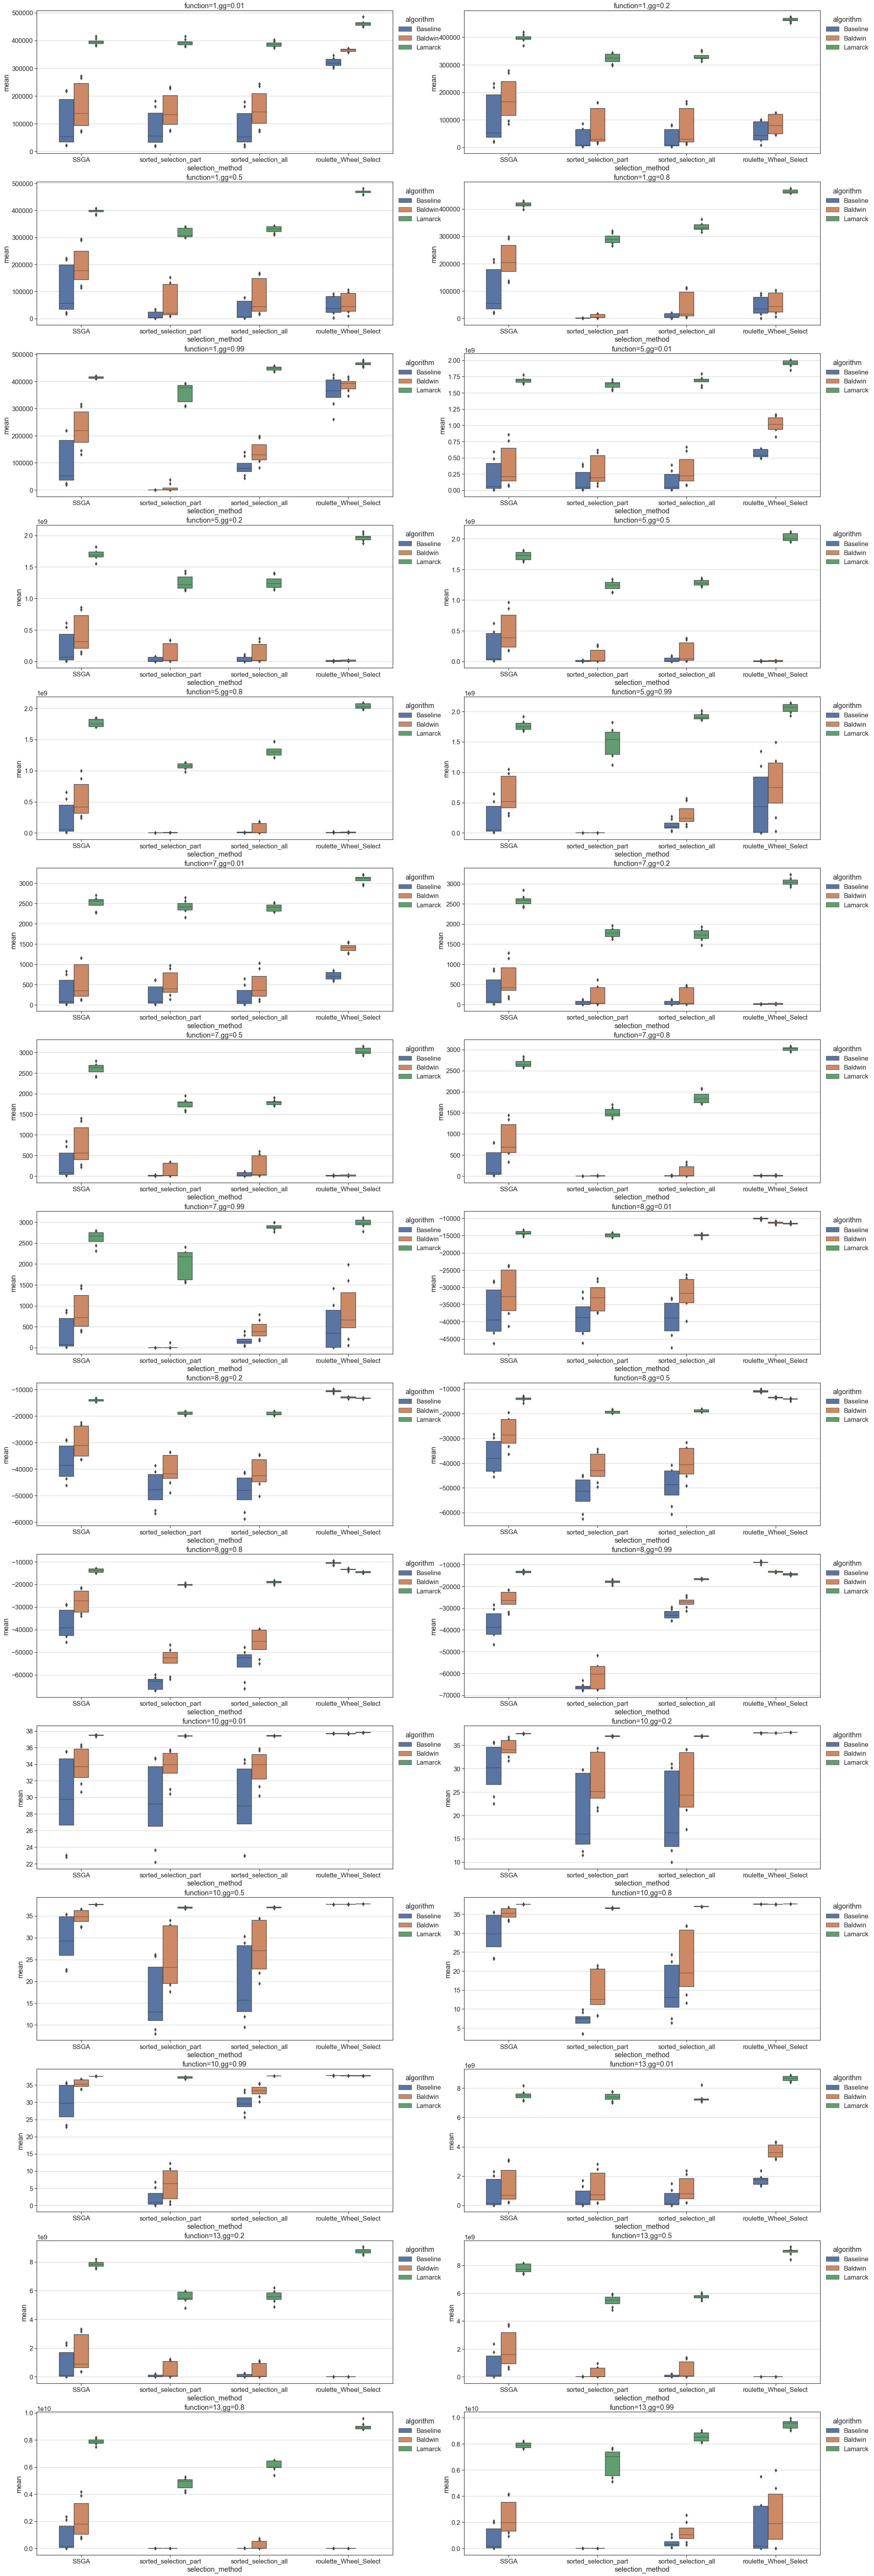

In [101]:
 def show_graph(dataframe,xp):
    rate = xp[0]
    tp = xp[1]
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 15
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        for w in gg_list:
            data = dataframe[dataframe["fitness_function"] == func]
            data = data[data[rate] == w]
            plt.subplot(dist_rows, dist_cols, i)
            ax = sns.boxenplot(data=data, y="mean",x=tp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.5)
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
            plt.title(f"function={func},{rate}={w}")
            i = i + 1
    plt.savefig(f"{tp}combine.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=[["gg",'selection_method']]
for i in xp_list:
    show_graph(dataframe=df,xp=i)

In [102]:
df_list=[]
for func in function_list:
    temp = df[df["fitness_function"] == func]
    temp = temp.reset_index(drop=True)
    df_list.append(temp)

sorted_list=[]
for i in df_list:
    print(i.shape)
    i = i.sort_values(by=['mean'],ascending=True)
    i["Rank"] = [i for i in range(1,i.shape[0]+1)]
    i = i.sort_index(ascending=True)
    sorted_list.append(i)
    # print(i.head(5))

(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)
(480, 29)


In [103]:
result = pd.concat(sorted_list, axis=1, join='inner')
print(result.shape,result.columns.tolist())

(480, 180) ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'fitness_function', 'algorithm', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max', 'Rank', 'num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'fitness_function', 'algorithm', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max', 'Rank', 'num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'fitness_function', 'algor

In [104]:
pmdf=result.filter(like="Rank")
pmdf.columns=["Rank1","Rank2","Rank3","Rank4","Rank5","Rank6"]
pmdf["sum"]=pmdf.sum(axis=1)

/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_26204/245682599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmdf["sum"]=pmdf.sum(axis=1)
/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_26204/245682599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmdf["sum"]=pmdf.sum(axis=1)


In [105]:
print(pmdf)

     Rank1  Rank2  Rank3  Rank4  Rank5  Rank6   sum
0      149    185    180    134    130    186   964
1      376    392    379    336    312    430  2225
2      229    216    233    179    186    224  1267
3      157    180    177    132    134    188   968
4      420    385    396    315    304    373  2193
..     ...    ...    ...    ...    ...    ...   ...
475    436    436    428    302    376    457  2435
476    195    199    198    198    147    204  1141
477    365    243    203    476    472    140  1899
478    475    477    464    318    425    480  2639
479    384    298    271    411    439    226  2029

[480 rows x 7 columns]
     Rank1  Rank2  Rank3  Rank4  Rank5  Rank6   sum
0      149    185    180    134    130    186   964
1      376    392    379    336    312    430  2225
2      229    216    233    179    186    224  1267
3      157    180    177    132    134    188   968
4      420    385    396    315    304    373  2193
..     ...    ...    ...    ...    ...  

In [106]:
pmdf = pmdf.sort_values(by=['sum'],ascending=True)
print(pmdf)

     Rank1  Rank2  Rank3  Rank4  Rank5  Rank6   sum
291      2      2      2      1      2      2    11
411      1      1      1      7      1      1    12
351      3      3      3     11      3      3    26
413      4      7      4      4      4      4    27
111      5      6      5      3      5      5    29
..     ...    ...    ...    ...    ...    ...   ...
322    474    470    476    410    460    444  2734
130    480    445    473    428    474    439  2739
190    456    459    479    427    473    459  2753
430    451    460    469    447    480    447  2754
10     462    462    475    437    477    449  2762

[480 rows x 7 columns]
     Rank1  Rank2  Rank3  Rank4  Rank5  Rank6   sum
291      2      2      2      1      2      2    11
411      1      1      1      7      1      1    12
351      3      3      3     11      3      3    26
413      4      7      4      4      4      4    27
111      5      6      5      3      5      5    29
..     ...    ...    ...    ...    ...  

In [107]:
pmtotal = pm[pm["fitness_function"] == 1]
pmtotal=pmtotal.reset_index(drop=True)
pmtotal=pmtotal.drop(columns=["fitness_function"])
print(pmtotal.shape)
print(pmtotal)

(480, 14)
     num_generations  mutation_rate  num_individuals  crossover_rate  \
0            1000000           0.04              100             0.5   
1            1000000           0.04              100             0.5   
2            1000000           0.04              100             0.5   
3            1000000           0.04              100             0.5   
4            1000000           0.04              100             0.5   
..               ...            ...              ...             ...   
475          1000000           0.02              100             0.7   
476          1000000           0.02              100             0.7   
477          1000000           0.02              100             0.7   
478          1000000           0.02              100             0.7   
479          1000000           0.02              100             0.7   

    mutation_type           crossover_type  local_search_rate  \
0          Normal  Probabilistic_crossover                0.

In [108]:
pmlist = pmdf.index.tolist()[:27]
print(pmlist)
last= pmtotal.iloc[pmlist]
print(last)
last = last[last["algorithm"] =="Baseline"]
print(last)
last.to_csv("./best_20_baseline.csv",header=True)

[291, 411, 351, 413, 111, 293, 471, 113, 339, 51, 459, 171, 462, 399, 231, 39, 342, 219, 53, 447, 173, 159, 461, 341, 327, 279, 450]
     num_generations  mutation_rate  num_individuals  crossover_rate  \
291          1000000           0.02              200             0.5   
411          1000000           0.01              200             0.5   
351          1000000           0.02              100             0.6   
413          1000000           0.01              200             0.5   
111          1000000           0.02              200             0.6   
293          1000000           0.02              200             0.5   
471          1000000           0.02              100             0.7   
113          1000000           0.02              200             0.6   
339          1000000           0.02              100             0.6   
51           1000000           0.04              100             0.5   
459          1000000           0.02              100             0.7   
171